***IMPORTED LIBRARIES AND LOADED DATA INTO MNIST TRAIN AND MNIST TEST***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import GridSearchCV

# Read Data
mnist_train = pd.read_csv("mnist_train.csv")
mnist_test = pd.read_csv("mnist_test.csv")

print("Train data :", mnist_train.shape)
print("Test data :", mnist_test.shape)

Train data : (60000, 785)
Test data : (10000, 785)


***SEPERATE THE LABELS AND TRAINING DATA***

Extract the labels from the MNIST train and test datasets.


Reset the index of the MNIST train and test datasets and store the images separately.


Remove the label column from the image datasets.


Convert the image datasets to NumPy arrays.


Split the MNIST train dataset into train and validation datasets.


Convert the image datasets to float32 and normalize their values.


Convert the label datasets to one-hot encoded vectors.


Assign the resulting datasets to their respective variables for later use in model training and evaluation.

The reason for using one-hot encoded vectors instead of actual labels in a neural network for the MNIST digit recognizer is that the network outputs a vector of probabilities for each possible label (0-9). By encoding the labels as one-hot vectors, we can compare the output probabilities of the network with the ground truth label using categorical cross-entropy loss. This loss function penalizes the model for incorrectly predicting a probability distribution that is different from the ground truth distribution.

In other words, using one-hot encoded vectors as labels allows the neural network to learn to distinguish between the different digits by minimizing the difference between the predicted probability distribution and the true distribution of the labels.

In [2]:
mnist_train_labels = mnist_train.iloc[:, 0]
mnist_test_labels = mnist_test.iloc[:, 0]

mnist_train_images = mnist_train.reset_index(drop=True)
mnist_test_images = mnist_test.reset_index(drop=True)

mnist_train_images = mnist_train_images.drop('label', axis=1)
mnist_test_images = mnist_test_images.drop('label', axis=1)

mnist_train_images = mnist_train_images.values
mnist_test_images = mnist_test_images.values

mnist_test_labels = mnist_test_labels.values
mnist_train_labels = mnist_train_labels.values

mnist_val_images = mnist_train_images[0:10000]
mnist_train_images = mnist_train_images[10000:]

mnist_val_labels = mnist_train_labels[0:10000]
mnist_train_labels = mnist_train_labels[10000:]

train_X = mnist_train_images.astype('float32')
test_X = mnist_test_images.astype('float32')
val_X = mnist_val_images.astype('float32')
train_X /= 255.0
test_X /= 255.0
val_X /= 255.0

train_y = mnist_train_labels
test_y = mnist_test_labels
val_y = mnist_val_labels

train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)
val_y = keras.utils.to_categorical(val_y, 10)



Here is a brief description of the neural network defined in the provided code:

The input layer has 784 nodes, which is the number of pixels in a flattened MNIST image.


There are 3 hidden layers with 200, 100, and 50 nodes, respectively. All use the ReLU activation function.


The output layer has 10 nodes, representing the 10 possible digits. It uses the softmax activation function to produce a probability distribution over the possible digits.


A neural network is a type of machine learning algorithm that is inspired by the structure and function of the human brain. The general concept behind neural networks is to use interconnected layers of artificial neurons to learn patterns in data. During the training process, the network is presented with examples of input-output pairs, and it adjusts the weights of the connections between the neurons to minimize the difference between its predicted outputs and the true outputs. Once trained, the network can be used to make predictions on new, unseen data.

In [7]:


from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

adam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss=["categorical_crossentropy"],
              metrics=['accuracy'])

model.summary()


# create a PyDot graph object from the Keras model
graph = pydot.Dot(graph_type='digraph')
graph = plot_model(model, show_shapes=True, show_layer_names=True,
                   rankdir='TB', expand_nested=False, dpi=96, to_file=None)

# customize the appearance of the nodes and edges in the graph
for node in graph.get_nodes():
    node.set_fontsize(12)
    node.set_shape('rectangle')
    node.set_style('rounded, filled')
    node.set_fillcolor('#78c2ad')

for edge in graph.get_edges():
    edge.set_color('#555555')
    edge.set_arrowsize(0.8)

# render the PyDot graph as an image and display it
Image(graph.create_png())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 200)               157000    
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


TypeError: expected str, bytes or os.PathLike object, not NoneType

Here are the justifications for the choices of activation functions and loss function in the given neural network:

relu: Rectified Linear Unit (ReLU) activation function is a popular choice for hidden layers in neural networks because it is computationally efficient and has been shown to work well in practice. ReLU helps prevent the vanishing gradient problem by avoiding saturation for positive inputs, which allows for better optimization during training.

softmax: Softmax activation function is used for the output layer of the neural network because it maps the output values to a probability distribution over the classes. This is useful in a classification task, where the goal is to predict the probability of the input belonging to each class.

categorical_crossentropy: Cross-entropy is a commonly used loss function for classification problems, especially when the output is a probability distribution over classes. Categorical cross-entropy specifically is used when there are multiple classes to predict. It measures the difference between the predicted probability distribution and the true probability distribution of the classes, and the goal is to minimize this difference during training. Categorical cross-entropy is a good choice for the MNIST digit recognition problem because it is a multi-class classification problem with 10 possible classes.

Here is a short description of what's happening in the model.fit method:

The fit method is used to train the neural network on the given training data.

train_X and train_y are the input features and output labels, respectively, for the training set.

The epochs parameter specifies the number of times to iterate over the entire training set.

The batch_size parameter specifies the number of samples to be used in each batch for gradient descent optimization.

The verbose parameter controls the verbosity level during training. A value of 1 shows a progress bar for each epoch, while 0 suppresses all output.

The shuffle parameter indicates whether to shuffle the training data at the beginning of each epoch.

The validation_data parameter specifies the validation set to be used for monitoring the model's performance during training. Here, val_X and val_y are the input features and output labels, respectively, for the validation set.

Overall, the fit method trains the neural network using backpropagation and adjusts the weights of the network to minimize the loss function. It outputs the history of the training process, including the loss and accuracy on both the training and validation sets, for each epoch.

In [4]:
model.fit(np.array(train_X),
          np.array(train_y),
          epochs=100,
          batch_size=500,
          verbose=1,
          shuffle=True,
          validation_data=(np.array(val_X), np.array(val_y)))


Epoch 1/100
100/100 [==============================] - 2s 12ms/step - loss: 0.5822 - accuracy: 0.8350 - val_loss: 0.2241 - val_accuracy: 0.9343
Epoch 2/100
100/100 [==============================] - 1s 9ms/step - loss: 0.1847 - accuracy: 0.9454 - val_loss: 0.1635 - val_accuracy: 0.9507
Epoch 3/100
100/100 [==============================] - 1s 11ms/step - loss: 0.1325 - accuracy: 0.9603 - val_loss: 0.1400 - val_accuracy: 0.9571
Epoch 4/100
100/100 [==============================] - 1s 11ms/step - loss: 0.1011 - accuracy: 0.9696 - val_loss: 0.1160 - val_accuracy: 0.9659
Epoch 5/100
100/100 [==============================] - 1s 11ms/step - loss: 0.0784 - accuracy: 0.9765 - val_loss: 0.1009 - val_accuracy: 0.9701
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0615 - accuracy: 0.9818 - val_loss: 0.0934 - val_accuracy: 0.9719
Epoch 7/100
100/100 [==============================] - 1s 11ms/step - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.0853 - val_accuracy: 0

13/13 [==============================] - 0s 6ms/step
F1 Score 0.9801993206509344


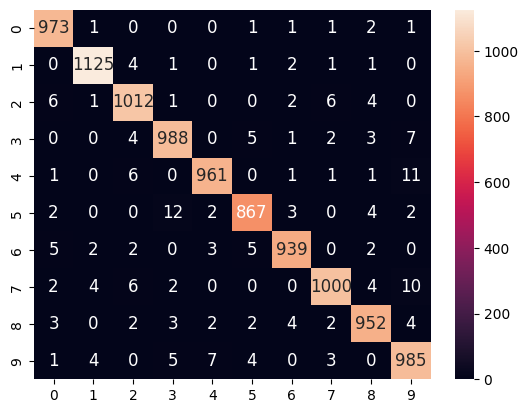

In [5]:
predictions = model.predict(np.array(test_X), 784)
print('F1 Score', f1_score(np.argmax(test_y,axis=1), np.argmax(predictions,axis=1), average='weighted'))
cm = confusion_matrix(np.argmax(test_y,axis=1), np.argmax(predictions,axis=1))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt="d")
plt.show()

In [6]:
score = model.evaluate(test_X, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1409 - accuracy: 0.9802
Test loss: 0.14094476401805878
Test accuracy: 0.9801999926567078


Test accuracy: 0.9272
F1 Score 0.9270213060563934


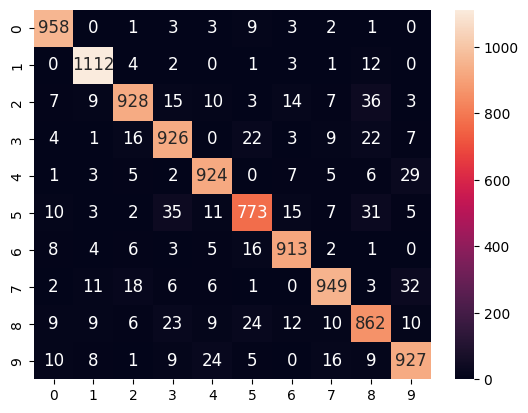

In [7]:
train_y = mnist_train_labels
test_y = mnist_test_labels
val_y = mnist_val_labels

model = LogisticRegression(multi_class='multinomial', max_iter = 1000)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print('Test accuracy:', accuracy)
print('F1 Score', f1_score(test_y, y_pred, average='weighted'))
cm = confusion_matrix(test_y, y_pred)
sn.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt="d")
plt.show()